In [2]:
#import libraries 
import requests         # allows us to make requests for API
import pandas as pd
import time
import datetime
import base64
from urllib.parse import urlencode

In [3]:
client_id = '00a745f1791c4e6a8579e36217d79138'
client_secret = '14f2b2ace1544b76ab6fb198fa131626'

In [4]:
basicUrl = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(basicUrl, {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}


In [5]:
# way to show data without ID
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# actual GET request
r = requests.get(BASE_URL + 'search/?q=' + 'Khalid' + '&type=artist',headers=headers) # get request for search
r = r.json() 
r['artists']['items'][0] # get the first relevant artist
khalidID = r['artists']['items'][0]['id'] # get the ID to get the full data

# pull all artists albums
r = requests.get(BASE_URL + 'artists/' + khalidID + '/albums', headers=headers, params={'include_groups': 'album', 'limit': 50})
d = r.json()

for album in d['items']:            # Organize all data of artist by album name and release date
    print(album['name'], ' --- ', album['release_date'])

Scenic Drive (The Tape)  ---  2021-12-03
Scenic Drive (The Tape)  ---  2021-12-03
Free Spirit  ---  2019-04-05
Suncity  ---  2018-10-19
Suncity  ---  2018-10-18
American Teen (Japan Version)  ---  2018-01-24
American Teen  ---  2017-04-27


In [6]:
# gets all information for all tracks (Khalid)

data = []   # will hold all track info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    
    trim_name = album_name.split('(')[0].strip()
    if trim_name.upper() in albums:
        continue
    albums.append(trim_name.upper()) # use upper() to standardize
    
      
    # this takes a few seconds so let's keep track of progress    
    print(album_name)
    
    # pull all tracks from this album: https://developer.spotify.com/console/get-album-tracks/
    r = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks', headers=headers)
    tracks = r.json()['items']
    
    for track in tracks:
        # get audio features (key, liveness, danceability, ...): https://developer.spotify.com/console/get-audio-features-track/
        f = requests.get(BASE_URL + 'audio-features/' + track['id'], 
            headers=headers)
        f = f.json()
        
        
        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'short_album_name': trim_name,
            'release_date': album['release_date'],
            'album_id': album['id'],
            'duration_ms' : track['duration_ms'],
        })
        
      

        data.append(f)


Scenic Drive (The Tape)
Free Spirit
Suncity
American Teen (Japan Version)


In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data)

In [185]:
# organize information acccordingly 

df['release_date'] = pd.to_datetime(df['release_date'])
df = df.sort_values(by=['release_date','track_name'])  
df['duration_ms'] = pd.to_datetime(df['duration_ms'], unit='ms')
df['duration (minutes)'] = df['duration_ms']   #create new column for duration to show just time (this can't be used for visualization)
df['duration (minutes)'] = pd.to_datetime(df['duration (minutes)'], unit='ms').dt.time # shows just time
df['artist'] = 'Khalid'


In [9]:
# fetch information for all of the albums (Khalid)

data1 = []   # will hold all track info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    
    trim_name = album_name.split('(')[0].strip()
    if trim_name.upper() in albums:
        continue
    albums.append(trim_name.upper()) # use upper() to standardize
    
      
    # this takes a few seconds so let's keep track of progress    
    print(album_name)
    
    r = requests.get(BASE_URL + 'albums/' + album['id'], headers=headers)
    r = r.json()
      

    data1.append(r)
    df2 = pd.DataFrame(data1)
    
    df2['release_date'] = pd.to_datetime(df2['release_date'])
    df2 = df2.sort_values(by=['release_date'])     

Scenic Drive (The Tape)
Free Spirit
Suncity
American Teen (Japan Version)


In [10]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# actual GET request with proper header
r = requests.get(BASE_URL + 'search/?q=' + 'Omar Apollo' + '&type=artist',headers=headers) # get request for search
r = r.json() 
r['artists']['items'][0] # get the first relevant artist
apolloID = r['artists']['items'][0]['id'] # get the ID to get the full data

# pull all artists albums
r = requests.get(BASE_URL + 'artists/' + apolloID + '/albums', headers=headers, params={'include_groups': 'album', 'limit': 50})
d = r.json()

for album in d['items']:            # Organize all data of artist by album name and release date
    print(album['name'], ' --- ', album['release_date'])
    

Ivory (Marfil)  ---  2022-08-12
Ivory  ---  2022-04-08
Apolonio  ---  2020-10-16
Apolonio  ---  2020-10-16
Friends  ---  2019-04-10
Stereo  ---  2018-05-30


In [11]:
# organize all of Omar Apollo's tracks information 

data2 = []   # will hold all track info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    
      # here's a hacky way to skip over albums we've already grabbed
    trim_name = album_name.split('(')[0].strip()
    if trim_name.upper() in albums:
        continue
    albums.append(trim_name.upper()) # use upper() to standardize
    
      
    # this takes a few seconds so let's keep track of progress    
    print(album_name)
    
    # pull all tracks from this album: https://developer.spotify.com/console/get-album-tracks/
    r = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks', headers=headers)
    tracks = r.json()['items']
    
    for track in tracks:
        # get audio features (key, liveness, danceability, ...): https://developer.spotify.com/console/get-audio-features-track/
        f = requests.get(BASE_URL + 'audio-features/' + track['id'], 
            headers=headers)
        f = f.json()
        
        
        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'short_album_name': trim_name,
            'release_date': album['release_date'],
            'album_id': album['id'],
            'duration_ms' : track['duration_ms'],
        })
        
    
        data2.append(f)
        
        

Ivory (Marfil)
Apolonio
Friends
Stereo


In [12]:
# organize all audio features of Omar Apollo's tracks 

df3 = pd.DataFrame(data2)


In [186]:
# organize information acccordingly 
df3['release_date'] = pd.to_datetime(df3['release_date'])
df3 = df3.sort_values(by=['release_date','track_name'])  
df3['duration_ms'] = pd.to_datetime(df3['duration_ms'], unit='ms')
df3['duration (minutes)'] = df3['duration_ms']   #create new column for duration to show just time (this can't be used for visualization)
df3['duration (minutes)'] = pd.to_datetime(df3['duration (minutes)'], unit='ms').dt.time # shows just time
df3['artist'] = 'Omar Apollo'


In [14]:
# fetch information for all of the albums (Omar Apollo)

data3 = []   # will hold all track info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    
    trim_name = album_name.split('(')[0].strip()
    if trim_name.upper() in albums:
        continue
    albums.append(trim_name.upper()) # use upper() to standardize
    
      
    # this takes a few seconds so let's keep track of progress    
    print(album_name)
    
    r = requests.get(BASE_URL + 'albums/' + album['id'], headers=headers)
    r = r.json()
      

    data3.append(r)
    df4 = pd.DataFrame(data3)
    
    df4['release_date'] = pd.to_datetime(df4['release_date'])
    df4 = df4.sort_values(by=['release_date'])   

Ivory (Marfil)
Apolonio
Friends
Stereo


In [187]:
# delete unncessary columns for analysis

# del df4['artists']
# del df4['available_markets']
# del df4['external_ids']
# del df4['external_urls']
# del df4['genres']
# del df4['copyrights']
# del df4['href']


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

From this plot we can see that generally the more danceable songs also have the most energy
The album with the most amount of danceable and energetic songs come from American Teen which is one of the older albums
We can claim that Khalid has slowly shifted away from creating energetic songs


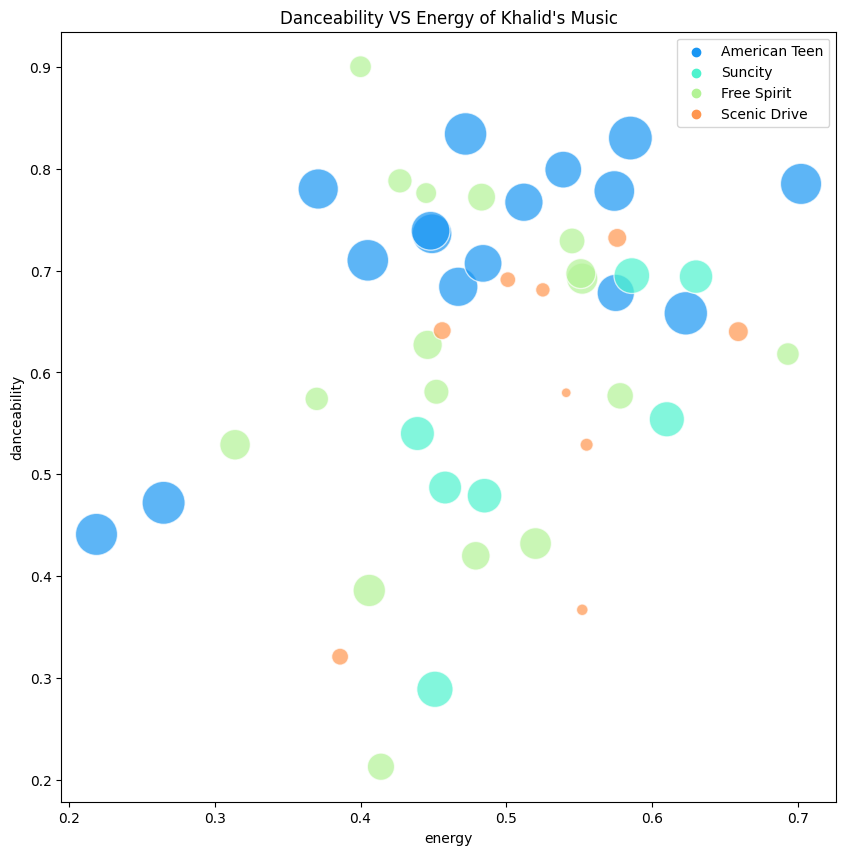

In [18]:
# Compares danceability of songs vs energy
plt.figure(figsize=(10,10))

danceability = sns.scatterplot(data=df, x='energy', y='danceability', 
                     hue='short_album_name', palette='rainbow', size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

danceability.set(title="Danceability VS Energy of Khalid's Music")

# display legend without `size` attribute
h,labs = danceability.get_legend_handles_labels()
danceability.legend(h[1:5], labs[1:10], loc='best', title=None)

print("From this plot we can see that generally the more danceable songs also have the most energy")
print("The album with the most amount of danceable and energetic songs come from American Teen which is one of the older albums")
print("We can claim that Khalid has slowly shifted away from creating energetic and danceable songs")

<Figure size 1000x1000 with 0 Axes>

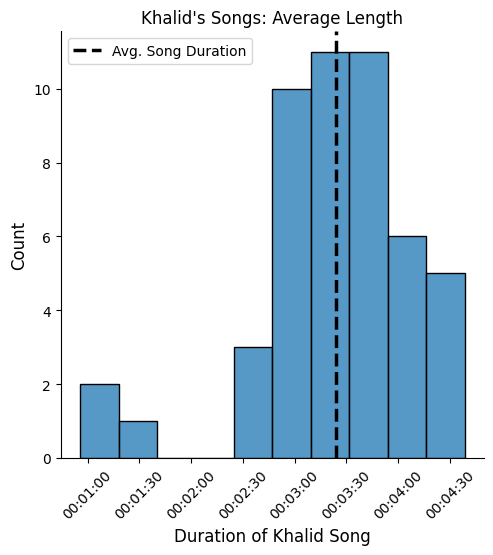

In [20]:
# Shows average duration of song
plt.figure(figsize=(10,10))
sns.displot(df, x="duration_ms",bins=10)
plt.xlabel("Duration of Khalid Song", size=12)
plt.ylabel("Count", size=12)
plt.title("Khalid's Songs: Average Length", size=12)
plt.axvline(x=df.duration_ms.mean(),
            color='black',
            ls='--', 
            lw=2.5)
plt.xticks(rotation=45)
plt.legend(labels=["Avg. Song Duration"])

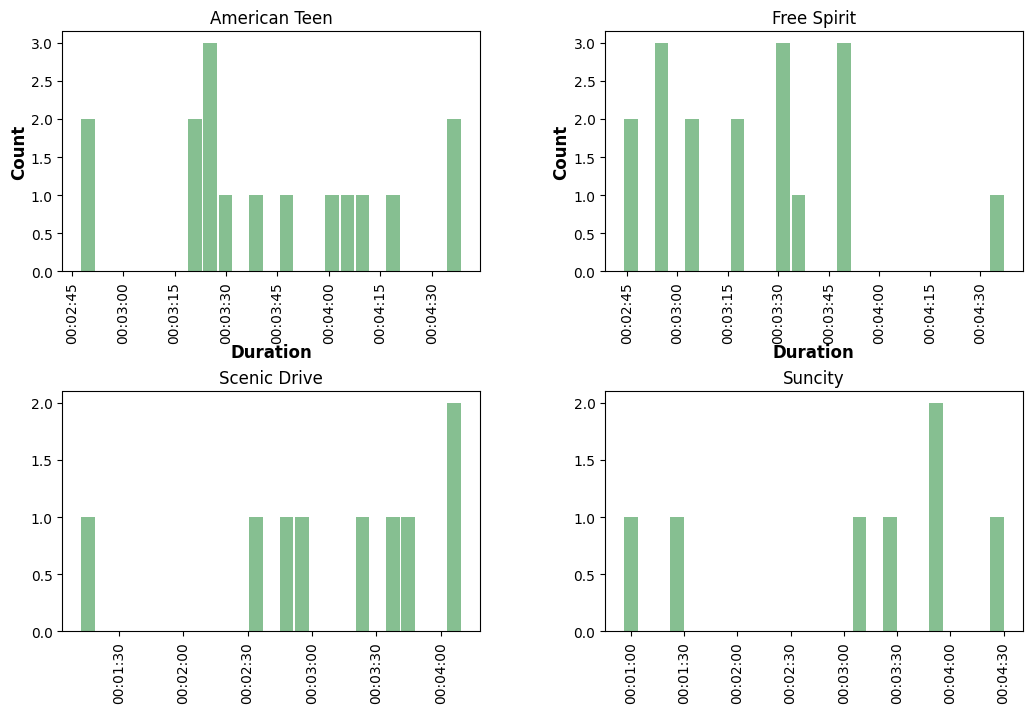

In [137]:
# Show duration of songs for each album
ax = df.hist(column='duration_ms', by='short_album_name', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.90)
ax = ax[0]

for x in ax:

    # Set x-axis label
    x.set_xlabel("Duration", labelpad=0, weight='bold', size=12)

    # Set y-axis label
    if i == 0:
        x.set_ylabel("Count", labelpad=2, weight='bold', size=12)

From this boxplot it is understood that there are no outliers for the Suncity album when it comes to the instrumentalness level.
There are outliers for the albums American Teen, Free Spirit, and Scenic Drive albums.
In the American Teen album one of the tracks had a lower level of instrumentalness showing that this track could've been more words sung. Which could be a sign that the outlier is the Interlude.
In the Free Spirit there are 3 tracks that have a higher level of instrumentalness than the average for the album.
In the Scenic Drive there is 1 track that is above the average level of instrumentalness and one below. Once again the one below could be the Interlude or a track where Khalid takes time to speak about the album's main idea.

The newest albums had much higher levels of instrumentalness when compared to the rest of the tracks in that album.
This could show that as Khalid makes more music he may be interested in pursuing more instrument based tracks.


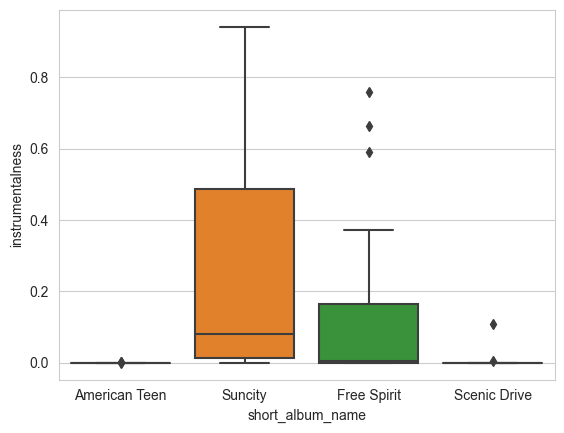

In [158]:
# Show instrumentalness of each album (using box plot)
sns.set_style("whitegrid")
sns.boxplot(x = 'short_album_name', y = 'instrumentalness', data = df)

print("From this boxplot it is understood that there are no outliers for the Suncity album when it comes to the instrumentalness level.")
print("There are outliers for the albums American Teen, Free Spirit, and Scenic Drive albums.")
print("In the American Teen album one of the tracks had a lower level of instrumentalness showing that this track could've been more words sung. Which could be a sign that the outlier is the Interlude.")
print("In the Free Spirit there are 3 tracks that have a higher level of instrumentalness than the average for the album.")
print("In the Scenic Drive there is 1 track that is above the average level of instrumentalness and one below. Once again the one below could be the Interlude or a track where Khalid takes time to speak about the album's main idea." )

# Show what we can learn from this
print("")
print("The newest albums had much higher levels of instrumentalness when compared to the rest of the tracks in that album.")
print("This could show that as Khalid makes more music he may be interested in pursuing more instrument based tracks.")

The most popular album that Khalid has made is Free Spirit
Free Spirit was released on   2019-04-05
Name: release_date, dtype: datetime64[ns]


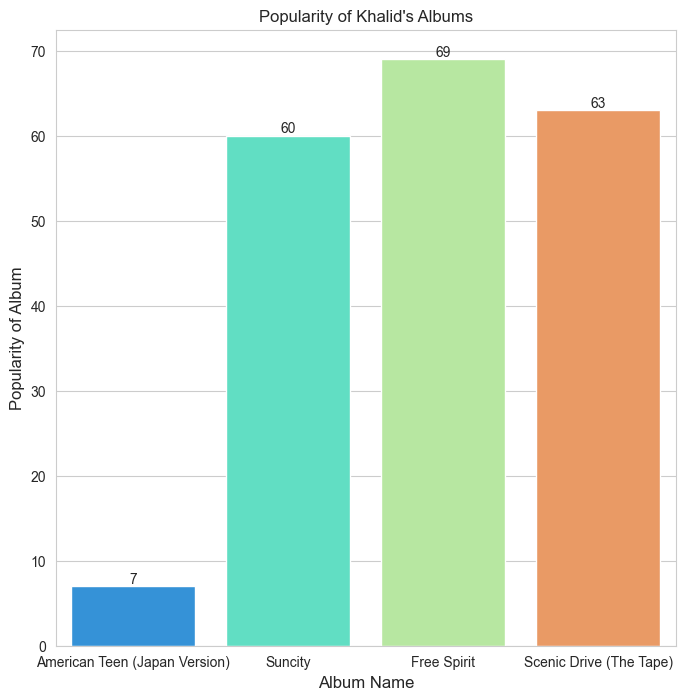

In [151]:
# show the popularity of Khalid's albums
plt.figure(figsize=(8,8))
popularity = sns.barplot(df2, x="name",y = 'popularity', palette='rainbow')
plt.xlabel("Album Name", size=12)
plt.title("Popularity of Khalid's Albums", size=12)
plt.ylabel("Popularity of Album", size=12)
for container in popularity.containers:
    popularity.bar_label(container)

print("The most popular album that Khalid has made is Free Spirit")
releaseDate = str(df2.loc[df2['popularity'] == df2.popularity.max(),'release_date'])
releaseDate = releaseDate.replace('1 ',' ')
print("Free Spirit was released on"  + releaseDate)

The first album that was the most popular was Apolonio
Apolonio was released on   2020-10-16
 
Name: release_date, dtype: datetime64[ns]


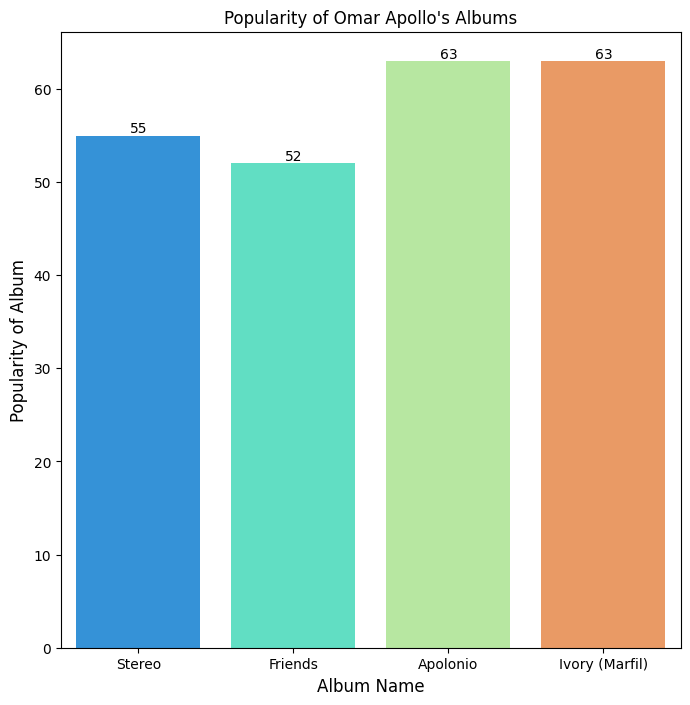

In [66]:
# Show popularity of various Omar's Albums
# show the popularity of Khalid's albums
plt.figure(figsize=(8,8))
omar = sns.barplot(df4, x="name",y = 'popularity', palette='rainbow')
plt.xlabel("Album Name", size=12)
plt.title("Popularity of Omar Apollo's Albums", size=12)
plt.ylabel("Popularity of Album", size=12)
for container in omar.containers:
    omar.bar_label(container)

print("The first album that was the most popular was Apolonio")
releaseDate = str(df4.loc[df4['popularity'] == df4.popularity.max(),'release_date'])
releaseDate = releaseDate.replace('1 ',' ')
releaseDate = releaseDate.replace('0   2022-08-12',' ') # parse and only show the first album that gained the most pop.
print("Apolonio was released on"  + releaseDate)

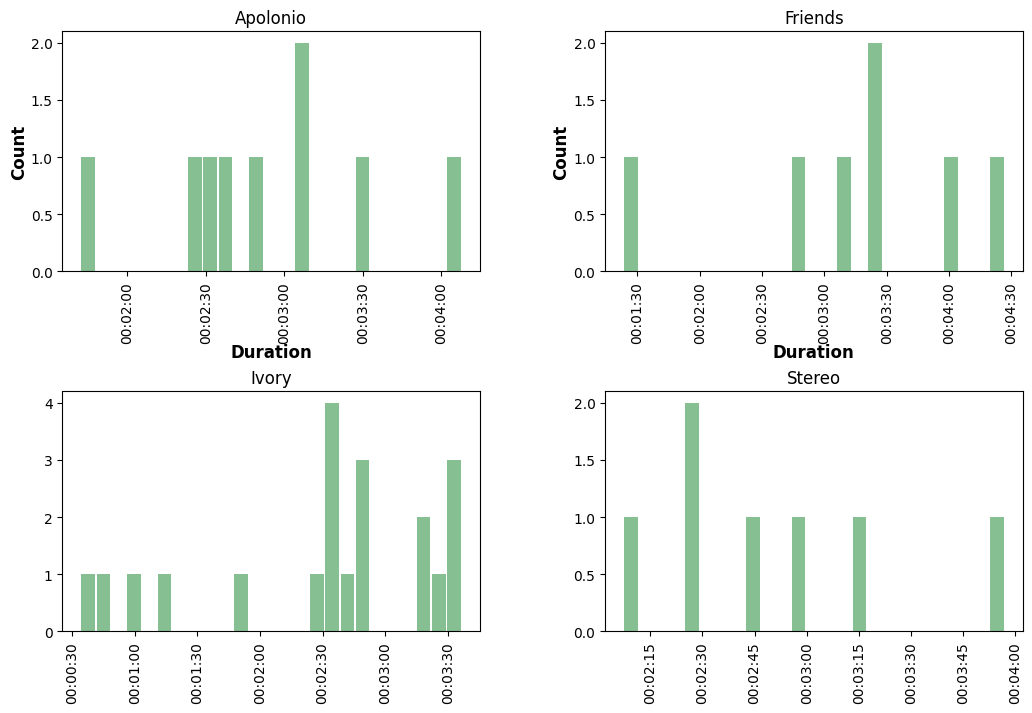

In [136]:
# Show duration of songs for each album
ax = df3.hist(column='duration_ms', by='short_album_name', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.90)
ax = ax[0]

for x in ax:

    # Set x-axis label
    x.set_xlabel("Duration", labelpad=0, weight='bold', size=12)

    # Set y-axis label
    if i == 0:
        x.set_ylabel("Count", labelpad=2, weight='bold', size=12)

From this boxplot it is understood that there outliers for all of Omar Apollo's songs with the instrumentalness factor
In both the Stereo and Friends albums there is one track that is an outlier for the instrumentalness level. The tracks are greater than the avg. instrumentalness for those albums.
In both the Apolonio and Ivory albums there are tracks that are both above and below the instrumentalness levels for the album respectively.
As we can tell the most recent albums having outliers both above and below the average Omar could aim to have more diverse albums in the future.


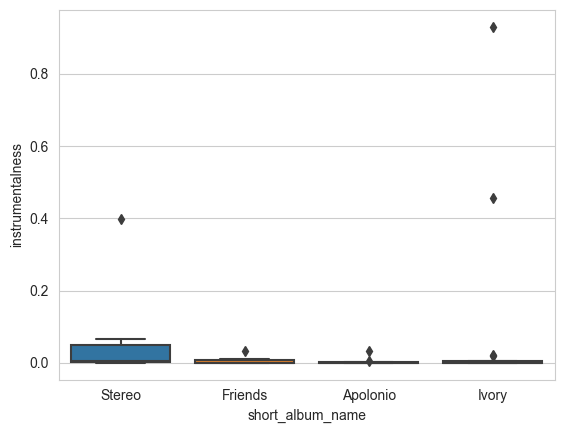

In [171]:
# Show instrumentalness of each album (using box plot)
sns.set_style("whitegrid")
sns.boxplot(x = 'short_album_name', y = 'instrumentalness', data = df3)

print("From this boxplot it is understood that there outliers for all of Omar Apollo's songs with the instrumentalness factor")
print("In both the Stereo and Friends albums there is one track that is an outlier for the instrumentalness level. The tracks are greater than the avg. instrumentalness for those albums.")
print("In both the Apolonio and Ivory albums there are tracks that are both above and below the instrumentalness levels for the album respectively.")

# What could future albums be like? 
print("As we can tell the most recent albums having outliers both above and below the average Omar could aim to have more diverse albums in the future.")

The album with the most amount of danceable and energetic tracks come from Ivory
Ivory has the most diverse set of tracks in regards to energy. The min level of energy from Ivory is 0.0746.
The max level of energy from Ivory is 0.856
Ivory has the most diverse set of tracks in regards to danceability.
The min level of danceability of tracks in Ivory is 0.192.
The max level of danceability of tracks in Ivory is 0.912.


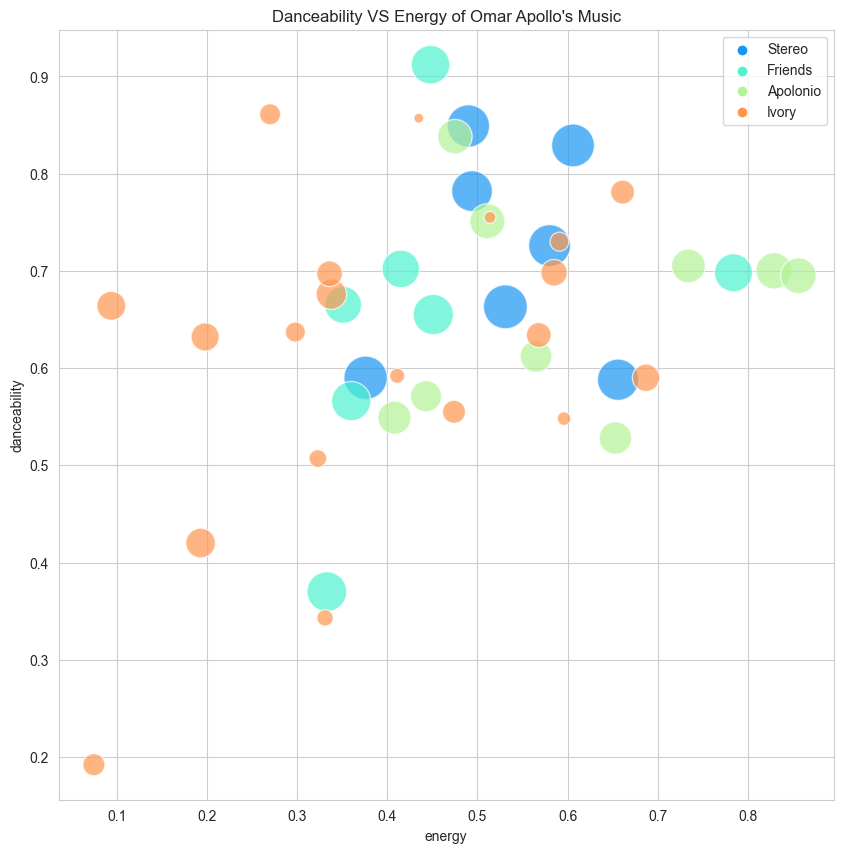

In [184]:
# Compares danceability of songs vs energy
plt.figure(figsize=(10,10))

danceability = sns.scatterplot(data=df3, x='energy', y='danceability', 
                     hue='short_album_name', palette='rainbow', size='duration_ms', sizes=(50,1000), 
                     alpha=0.7)

danceability.set(title="Danceability VS Energy of Omar Apollo's Music")

# display legend without `size` attribute
h,labs = danceability.get_legend_handles_labels()
danceability.legend(h[1:5], labs[1:10], loc='best', title=None)

print("The album with the most amount of danceable and energetic tracks come from Ivory")
print("Ivory has the most diverse set of tracks in regards to energy. The min level of energy from Ivory is " + str(df3.energy.min()) + ".")
print("The max level of energy from Ivory is " + str(df3.energy.max()))
print("Ivory has the most diverse set of tracks in regards to danceability.")
print("The min level of danceability of tracks in Ivory is " + str(df3.danceability.min()) +  ".")
print("The max level of danceability of tracks in Ivory is " + str(df3.danceability.max()) +  ".")